In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



     |████████████████████████████████| 993kB 31.9MB/s 


KeyboardInterrupt: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import tensorflow as tf

In [0]:
print(tf.__version__)

2.0.0-beta1


In [0]:
pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 32.6MB/s 
     |████████████████████████████████| 501kB 36.9MB/s 
     |████████████████████████████████| 3.1MB 31.5MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
import pandas as pd

2.0.0-beta1


In [0]:
dataset = tf.data.Dataset.range(10)
for val in dataset:
   print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [0]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [0]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [0]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
  print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [0]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
  print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [0]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
  print(x.numpy(), y.numpy())

[5 6 7 8] [9]
[0 1 2 3] [4]
[2 3 4 5] [6]
[1 2 3 4] [5]
[4 5 6 7] [8]
[3 4 5 6] [7]


In [0]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())

x =  [[2 3 4 5]
 [5 6 7 8]]
y =  [[6]
 [9]]
x =  [[1 2 3 4]
 [0 1 2 3]]
y =  [[5]
 [4]]
x =  [[3 4 5 6]
 [4 5 6 7]]
y =  [[7]
 [8]]


In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [0]:
def trend(time, slope=0):
    return slope * time

In [0]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

In [0]:
def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

In [0]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [0]:
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

In [0]:
# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

In [0]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [0]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [0]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

In [0]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=1)

Epoch 1/100
31/31 [==============================] - 1s 46ms/step - loss: 207.3965
Epoch 2/100
31/31 [==============================] - 0s 10ms/step - loss: 141.7176
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 104.6541
Epoch 4/100
31/31 [==============================] - 0s 10ms/step - loss: 89.5208
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 85.8779
Epoch 6/100
31/31 [==============================] - 0s 9ms/step - loss: 93.4858
Epoch 7/100
31/31 [==============================] - 0s 10ms/step - loss: 86.9460
Epoch 8/100
31/31 [==============================] - 0s 10ms/step - loss: 71.8860
Epoch 9/100
31/31 [==============================] - 0s 10ms/step - loss: 78.0796
Epoch 10/100
31/31 [==============================] - 0s 10ms/step - loss: 79.6231
Epoch 11/100
31/31 [==============================] - 0s 10ms/step - loss: 67.0417
Epoch 12/100
31/31 [==============================] - 0s 10ms/step - loss: 74.3584
Epoch 13/100

In [0]:

print("Layer weights {}".format(l0.get_weights()))

forecast = []

Layer weights [array([[ 0.20245337],
       [ 0.04736644],
       [-0.43593317],
       [-0.3850847 ],
       [-0.17733264],
       [-0.44088268],
       [-0.5264359 ],
       [ 0.17112899],
       [-0.44186753],
       [ 0.14606482],
       [ 0.13092482],
       [-0.08147794],
       [ 0.14267808],
       [ 0.28064883],
       [-0.04588377],
       [ 0.04725188],
       [ 0.05331135],
       [ 0.21254396],
       [-0.25854638],
       [ 0.4237861 ]], dtype=float32), array([0.], dtype=float32)]


6.384454

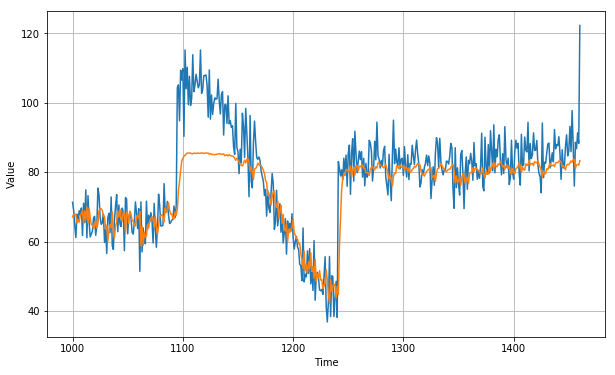

In [0]:
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [0]:
def trend(time, slope=0):
    return slope * time

In [0]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

In [0]:
def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

In [0]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [0]:
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

In [0]:
# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [0]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast


In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

window_size = 30
train_set = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)


W0903 03:41:48.011053 140121217296256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/util/random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])

In [0]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
#batch_size = 16
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


Epoch 1/100


ValueError: ignored

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])


In [0]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=500)

rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

Epoch 1/500


ValueError: ignored

2.0.0-beta1
--2019-09-03 03:57:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:808::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [application/octet-stream]
Saving to: ‘/tmp/sunspots.csv’

/tmp/sunspots.csv   100%[===================>]  69.17K  --.-KB/s    in 0s      

2019-09-03 03:57:56 (162 MB/s) - ‘/tmp/sunspots.csv’ saved [70827/70827]

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(3000,)
Epoch 1/100
12/12 [==============================] - 6s 536ms/step - loss: 80.3072 - mae: 80.3315
Epoch 2/100
12/12 [==============================] - 4s 345ms/step - loss: 78.5038 - mae: 78.5937
Epoch 3/100
12/12 [==============================] - 4s 345ms/step - loss: 75.8321 - mae: 75.9399
Epoch 4/1

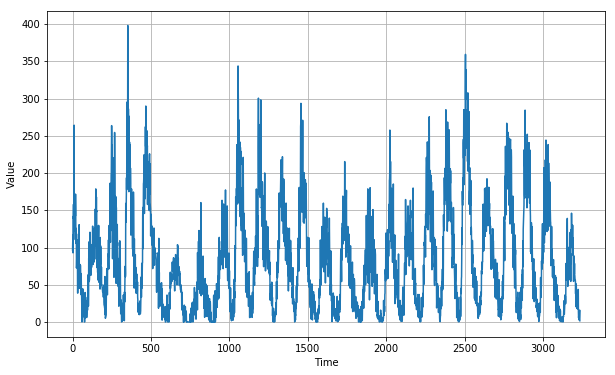

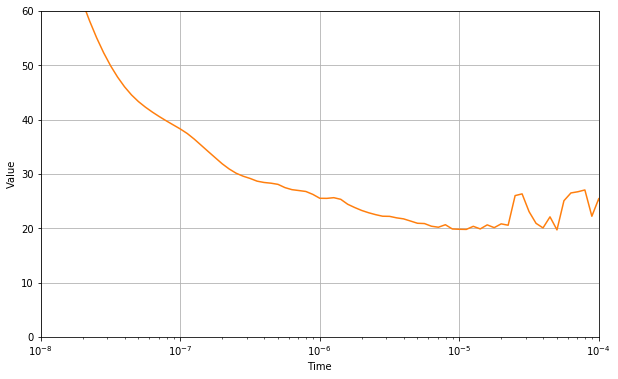

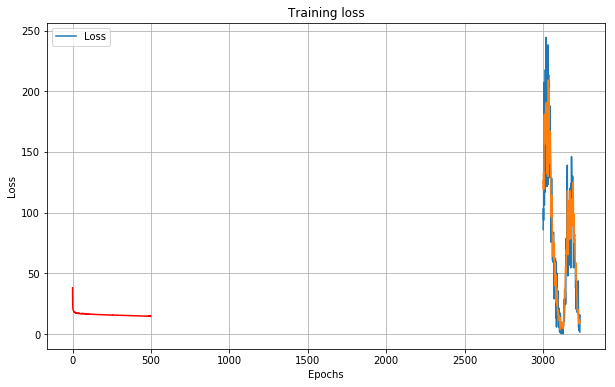

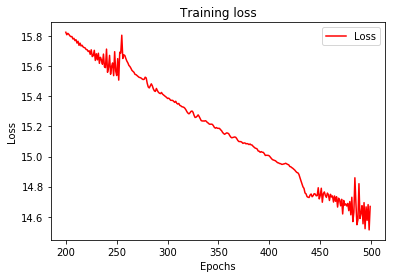

<Figure size 432x288 with 0 Axes>

In [0]:
# -*- coding: utf-8 -*-
"""S+P Week 4 Lesson 5.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP%20Week%204%20Lesson%205.ipynb
"""

!pip install tensorflow==2.0.0b1

import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv \
    -O /tmp/sunspots.csv

import csv
time_step = []
sunspots = []

with open('/tmp/sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()



zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

print(rnn_forecast)

**PLEASE WORK**

**PLEASE WORK**

**PLEASE WORK**

**PLEASE WORK**

**PLEASE WORK**

**PLEASE WORK**

**PLEASE WORK**

**PLEASE WORK**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/Colab Notebooks/'

In [0]:
import csv
load = []
time_step = []

with open(root_path +'ercot/ercot-dataset.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  i =0;
  for row in reader:
    load.append(float(row[10]))
    time_step.append(i)
    i += 1
    

In [0]:
import numpy as np
import matplotlib.pyplot as plt


def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

series = np.array(load)
time = np.array(time_step)
#plt.figure(figsize=(10, 6))
#plot_series(time, series)


'''series = np.array(load[:1440])
time = np.array(time_step[:1440])
plt.figure(figsize=(10, 6))
plot_series(time, series)


series = np.array(load[:17520])
time = np.array(time_step[:17520])
plt.figure(figsize=(10, 6))
plot_series(time, series)

series = np.array(load[17520:35040])
time = np.array(time_step[17520:35040])
plt.figure(figsize=(10, 6))
plot_series(time, series)

series = np.array(load[35040:52560])
time = np.array(time_step[35040:52560])
plt.figure(figsize=(10, 6))
plot_series(time, series)

series = np.array(load[52560:70080])
time = np.array(time_step[52560:70080])
plt.figure(figsize=(10, 6))
plot_series(time, series)'''

'series = np.array(load[:1440])\ntime = np.array(time_step[:1440])\nplt.figure(figsize=(10, 6))\nplot_series(time, series)\n\n\nseries = np.array(load[:17520])\ntime = np.array(time_step[:17520])\nplt.figure(figsize=(10, 6))\nplot_series(time, series)\n\nseries = np.array(load[17520:35040])\ntime = np.array(time_step[17520:35040])\nplt.figure(figsize=(10, 6))\nplot_series(time, series)\n\nseries = np.array(load[35040:52560])\ntime = np.array(time_step[35040:52560])\nplt.figure(figsize=(10, 6))\nplot_series(time, series)\n\nseries = np.array(load[52560:70080])\ntime = np.array(time_step[52560:70080])\nplt.figure(figsize=(10, 6))\nplot_series(time, series)'

In [0]:
split_time = 70000
time_train = time[:split_time]
x_train = load[:split_time]
time_valid = time[split_time:]
x_valid = load[split_time:]


window_size = 2
batch_size = 32
shuffle_buffer_size = 1000


TypeError: ignored

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [0]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mean_absolute_percentage_error", optimizer='adam', metrics=["mape"])
history = model.fit(dataset,epochs=100,verbose=1)




Epoch 1/100
2188/2188 [==============================] - 18s 8ms/step - loss: 4.5649 - mape: 4.5657
Epoch 2/100
2188/2188 [==============================] - 10s 5ms/step - loss: 1.2696 - mape: 1.2697
Epoch 3/100
2188/2188 [==============================] - 10s 5ms/step - loss: 1.2174 - mape: 1.2174
Epoch 4/100
2188/2188 [==============================] - 10s 5ms/step - loss: 1.2141 - mape: 1.2142
Epoch 5/100
2188/2188 [==============================] - 10s 4ms/step - loss: 1.2166 - mape: 1.2167
Epoch 6/100
2188/2188 [==============================] - 11s 5ms/step - loss: 1.2128 - mape: 1.2129
Epoch 7/100
2188/2188 [==============================] - 10s 5ms/step - loss: 1.2130 - mape: 1.2130
Epoch 8/100
2188/2188 [==============================] - 10s 5ms/step - loss: 1.2126 - mape: 1.2127
Epoch 9/100
2188/2188 [==============================] - 10s 5ms/step - loss: 1.2100 - mape: 1.2101
Epoch 10/100
2188/2188 [==============================] - 10s 5ms/step - loss: 1.2103 - mape: 1.2103

In [0]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


#plt.figure(figsize=(10, 6))

#plot_series(time_valid, x_valid)
#plot_series(time_valid, results)

In [0]:
tf.keras.metrics.mean_absolute_percentage_error(x_valid, results).numpy()

1.0635368

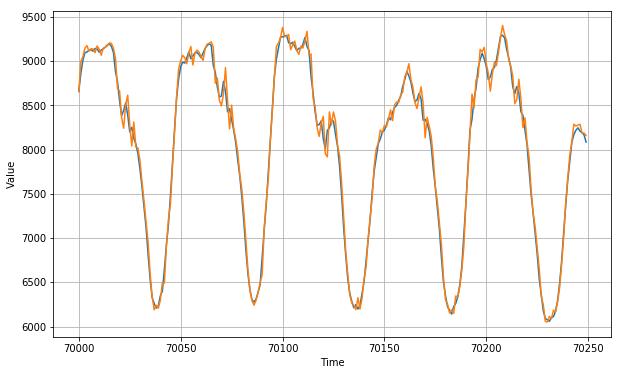

In [0]:
plt.figure(figsize=(10, 6))

plot_series(time_valid[:250], x_valid[:250])
plot_series(time_valid[:250], results[:250])

<Figure size 432x288 with 0 Axes>

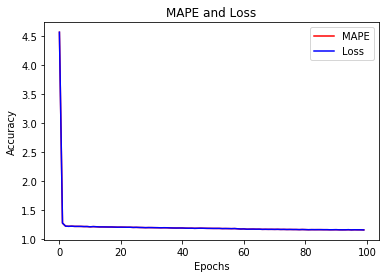

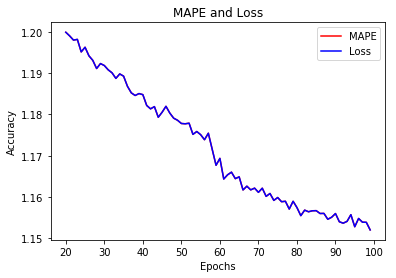

<Figure size 432x288 with 0 Axes>

In [0]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mape=history.history['mape']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAPE and Loss
#------------------------------------------------
plt.plot(epochs, mape, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAPE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAPE", "Loss"])

plt.figure()

epochs_zoom = epochs[20:]
mae_zoom = mape[20:]
loss_zoom = loss[20:]

#------------------------------------------------
# Plot Zoomed MAPE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAPE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAPE", "Loss"])

plt.figure()

In [0]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss="mean_absolute_percentage_error", optimizer='adam', metrics=["mean_absolute_percentage_error"])
history = model.fit(dataset,epochs=10,verbose=1)







forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)







tf.keras.metrics.mean_absolute_percentage_error(x_valid, results).numpy()





plt.figure(figsize=(10, 6))

plot_series(time_valid[:250], x_valid[:250])
plot_series(time_valid[:250], results[:250])





Epoch 1/10
   1222/Unknown - 11s 9ms/step - loss: 41.2798 - mean_absolute_percentage_error: 93.8951

KeyboardInterrupt: ignored

In [0]:
tf.keras.metrics.mean_absolute_percentage_error(x_valid, results).numpy()

1.4307379

In [0]:
def windowed_dataset_1(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

window_size = 16
batch_size = 32
shuffle_buffer_size = 1000

dataset = windowed_dataset_1(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(1)
])

model.compile(loss="mean_absolute_percentage_error", optimizer='adam', metrics=["mape"])
history = model.fit(dataset,epochs=100,verbose=1)







forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)







tf.keras.metrics.mean_absolute_percentage_error(x_valid, results).numpy()





plt.figure(figsize=(10, 6))

plot_series(time_valid[:250], x_valid[:250])
plot_series(time_valid[:250], results[:250])





Epoch 1/100
2187/2187 [==============================] - 20s 9ms/step - loss: 2.1252 - mape: 2.1252
Epoch 2/100
2187/2187 [==============================] - 12s 6ms/step - loss: 1.2991 - mape: 1.2991
Epoch 3/100
2187/2187 [==============================] - 13s 6ms/step - loss: 1.2090 - mape: 1.2090
Epoch 4/100
2187/2187 [==============================] - 13s 6ms/step - loss: 1.1841 - mape: 1.1841
Epoch 5/100
2187/2187 [==============================] - 13s 6ms/step - loss: 1.1739 - mape: 1.1739
Epoch 6/100
2187/2187 [==============================] - 13s 6ms/step - loss: 1.1585 - mape: 1.1585
Epoch 7/100
2187/2187 [==============================] - 13s 6ms/step - loss: 1.1502 - mape: 1.1502
Epoch 8/100
2187/2187 [==============================] - 13s 6ms/step - loss: 1.1430 - mape: 1.1430
Epoch 9/100
2187/2187 [==============================] - 12s 6ms/step - loss: 1.1384 - mape: 1.1384
Epoch 10/100
2187/2187 [==============================] - 13s 6ms/step - loss: 1.1349 - mape: 1.1349

ValueError: ignored

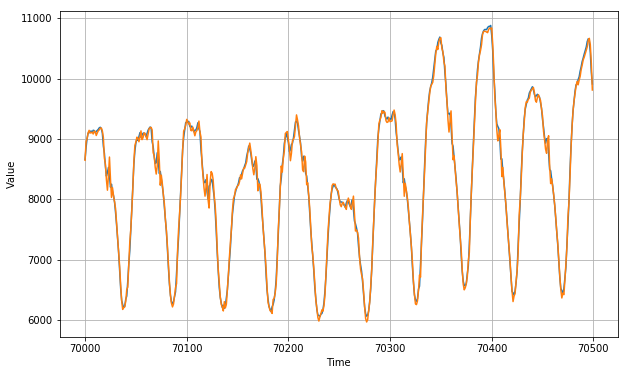

In [0]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast
  
  
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]



plt.figure(figsize=(10, 6))
plot_series(time_valid[:500], x_valid[:500])
plot_series(time_valid[:500], rnn_forecast[:500])

In [0]:
tf.keras.metrics.mean_absolute_percentage_error(x_valid, results).numpy()

1.0635368

<Figure size 432x288 with 0 Axes>

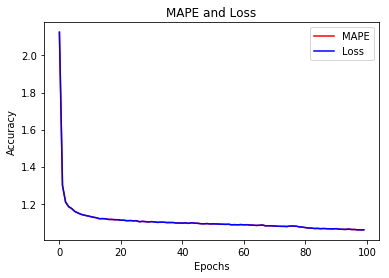

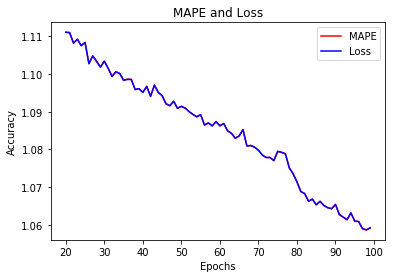

<Figure size 432x288 with 0 Axes>

In [0]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mape=history.history['mape']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAPE and Loss
#------------------------------------------------
plt.plot(epochs, mape, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAPE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAPE", "Loss"])

plt.figure()

epochs_zoom = epochs[20:]
mae_zoom = mape[20:]
loss_zoom = loss[20:]

#------------------------------------------------
# Plot Zoomed MAPE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAPE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAPE", "Loss"])

plt.figure()

In [0]:
def windowed_dataset_1(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

window_size = 16
batch_size = 32
shuffle_buffer_size = 1000

dataset = windowed_dataset_1(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

model.compile(loss="mean_absolute_percentage_error", optimizer='adam', metrics=["mean_absolute_percentage_error"])
history = model.fit(dataset,epochs=20,verbose=1)


Epoch 1/20
2187/2187 [==============================] - 63s 29ms/step - loss: 33.7662 - mean_absolute_percentage_error: 33.7662
Epoch 2/20
2187/2187 [==============================] - 56s 26ms/step - loss: 13.6024 - mean_absolute_percentage_error: 13.6024
Epoch 3/20
2187/2187 [==============================] - 56s 26ms/step - loss: 13.5731 - mean_absolute_percentage_error: 13.5731
Epoch 4/20
2187/2187 [==============================] - 56s 25ms/step - loss: 13.5655 - mean_absolute_percentage_error: 13.5655
Epoch 5/20
2187/2187 [==============================] - 55s 25ms/step - loss: 13.5258 - mean_absolute_percentage_error: 13.5258
Epoch 6/20
2187/2187 [==============================] - 56s 25ms/step - loss: 13.2378 - mean_absolute_percentage_error: 13.2378
Epoch 7/20
2187/2187 [==============================] - 56s 26ms/step - loss: 12.9915 - mean_absolute_percentage_error: 12.9915
Epoch 8/20
2187/2187 [==============================] - 56s 26ms/step - loss: 12.9344 - mean_absolute_pe

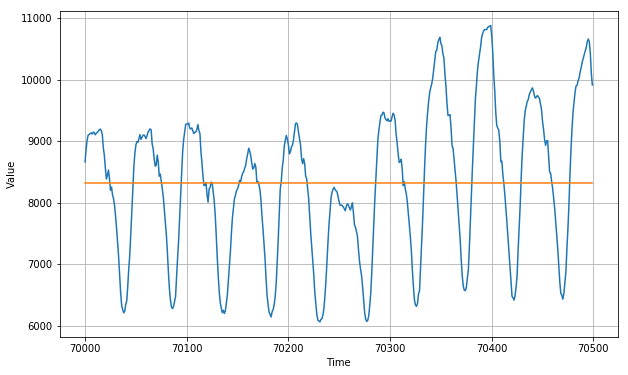

In [0]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast
  
  
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]



plt.figure(figsize=(10, 6))
plot_series(time_valid[:500], x_valid[:500])
plot_series(time_valid[:500], rnn_forecast[:500])

In [0]:
tf.keras.metrics.mean_absolute_percentage_error(x_valid, results).numpy()

1.0635368

<Figure size 432x288 with 0 Axes>

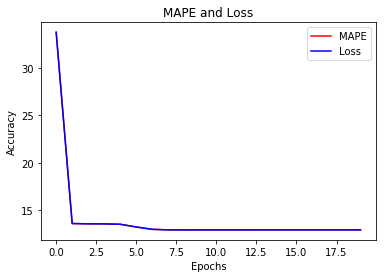

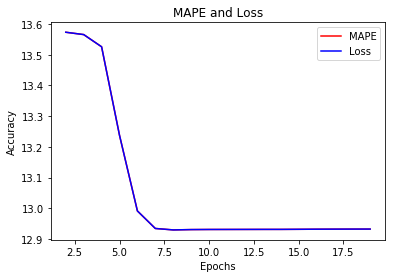

<Figure size 432x288 with 0 Axes>

In [0]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mape=history.history['mean_absolute_percentage_error']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAPE and Loss
#------------------------------------------------
plt.plot(epochs, mape, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAPE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAPE", "Loss"])

plt.figure()

epochs_zoom = epochs[2:]
mae_zoom = mape[2:]
loss_zoom = loss[2:]

#------------------------------------------------
# Plot Zoomed MAPE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAPE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAPE", "Loss"])

plt.figure()